# Midterm Project: Equity Portfolio Management

## Project Members

| Name                             | UCID   |
|----------------------------------|--------|
| Ashik Manikandan Chandrasekaran  | ac2528 |
| Atul Bhargav Kurumalla Srinivasa | ak2832 |
| Prajwal B Mani                   | pbm6   |

### Data Preparation

Download the historial daily data of the entire 2018 for the 10 stocks 


```python
universe_of_Stocks = ['IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN', 'FB', 'NFLX', 'TSLA', 'ORCL', 'SAP']
```

For example, to download IBM data, use the following link to go to yahoo finance page. Find the "Download Data" link to download the csv file to you local disk.
https://finance.yahoo.com/quote/IBM/history?period1=1514782800&period2=1546232400&interval=1d&filter=history&frequency=1d

Replace "IBM" with other stock symbol in the above URL, you will be able to download data for other 9 stocks.

You should have 10 csv files on your disk now. IBM.csv, MSFT.csv, etc. We call the 10 stocks "universe_of_Stocks" which is the entire stock market you can trade.



### Retrieve the "Close" and "Adj Close" values for each stock

You will create a dataframe where there are 20 columns for the 10 stocks, each row is the "Close" and "Adj Close" prices for the 10 stocks on each day, in the order of the business days in 2018. Assume all buy/sell on the "Close" prices and there is no transaction cost.

### You start to manage 5 million dollars fund on Jan 02, 2018

You have a strategy to manage the fund.

1. On Jan 02 2018, you split the \\$5m into 5 \\$1m, and use them to buy 5 stocks from the 10 stocks. For example, IBM close price was \\$154.25. With \\$1m, you can buy max 6482 shares with cost \\$999848.5 with \\$151.5‬ cash left. You decided to spend \\$1m on each of ['IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN'] respectively and keep the rest cash into a zero-interest cash account. On Jan 02 2018, your mark to market value (Mark_to_Market) is \\$5m if combining all stocks value and cash. Your holdings of stocks and cach account is your portfolio.

\begin{equation*}
\ Mark_to_Market^t =  cash^t + \sum_{k=1}^5 Shares_k^t \times stock_price_closed_k^t \
\end{equation*}


2. Your trading strategy is "5 days rebalancing of buying low". Here is how it works. You keep your portfolio unchanged until 5 days later on Jan 09 2018. Now you want to re-check the market and adjust your portfolio. You will compute the "Adj Close" price changes from Jan 02 to Jan 09, and find the 5 stocks whose "Adj Close" prices dropped the most in terms of percentage. You sell all current holdings on Jan 09 "Close" prices to convert your portfolio to all cash. Then immediately split your cash, including your cash account, to 5 equal parts to buy the 5 stocks that dropped the most from Jan 02 to Jan 09 on 'Adj Close' prices. You always buy the max shares of stock on the "Close" price and keep the rest cash in cash account. Now the portfolio should be different from 5 days ago. This operation is called "rebalancing".

    Keep in mind, the Mark_to_Market will change every day, even when your portfolio holdings don't change, because the stock prices change.


3. Corporations generally issue stock dividends on some days. The total dividend you get on such a day is the stock dividend  times your shares if you have shares of this stock on the dividend day. If you buy shares on the dividend day, these bought shares are not qualified to get dividend. If you sell shares on the dividend day, the sold shares are qualified to get dividend. For example, on 2/8/2018, IBM issued \$1.5 dividend per share. In your cash account, you will automatically get

\begin{equation*}
\$1.5 \times \left(your\ IBM\ shares\ on\ 2/8/2018\right)
\end{equation*} 



4. 5 business days later on Jan 17 (Jan 15 was a holiday), you re-check the market and adjust your portfolio again. You will have a new portfolio on Jan 17.


5. If you run this strategy every 5 days all the way to Dec 31 2018, you will have a daily Mark_to_Market. You expect the Mark_to_Market on Dec 31 2018 should be higher than \$5m because you always buy the stocks that dropped the most, i.e., you always buy low.


6. Another strategy is "5 days rebalancing of buying high". You always buy the 5 stocks whose "Adj Close" prices surge the most in terms of percentage because you believe the trend will continue. Run the new strategy and see how the Mark_to_Market will change.


7. You will create a "high tech index" which is simply the daily average of the 10 stocks "Close" prices. Compare your Mark_to_Market series with the "high tech index" and plot their curves. To plot the two curves together, you may want to convert the series to daily percentage change with regard to Jan 02 2018.


8. Download the USD/JPY 2018 historical data at https://www.myfxbook.com/en/forex-market/currencies/USDJPY-historical-data then use the "Close" column as the rate to convert your Mark_to_Market series from USD to JPY. Plot the two Mark_to_Market curves. You will need to convert to daily percentage change too.


9. The above two strategies both rebalance every 5 days. Try to change the days interval and find the optimal days interval that maximizes the Mark_to_Market on 12/31/2018. 




#### Required Datasets
- Load historial daily data of the 2018 year for the 10 stocks which was downloaded from the yahoo website.<br>  
- USD/JPY 2018 historical data
- All the csv files is under data folder.

In [1]:
options(warn=-1)

In [2]:
ibm = read.csv("data/IBM.csv")[,c(1,5,6)]
msft = read.csv("data/MSFT.csv")[,c(1,5,6)]
goog = read.csv("data/GOOG.csv")[,c(1,5,6)]
amzn = read.csv("data/AMZN.csv")[,c(1,5,6)]
fb = read.csv("data/META.csv")[,c(1,5,6)]
nflx = read.csv("data/NFLX.csv")[,c(1,5,6)]
tsla = read.csv("data/TSLA.csv")[,c(1,5,6)]
orcl = read.csv("data/ORCL.csv")[,c(1,5,6)]
sap = read.csv("data/SAP.csv")[,c(1,5,6)]
aapl = read.csv("data/AAPL.csv")[,c(1,5,6)]
forex = read.csv("data/USDJPY.csv",header=TRUE)

In [3]:
head(goog,3)

,Date,Close,Adj.Close
,<chr>,<dbl>,<dbl>
1,2018-01-02,1065.00,1065.00
2,2018-01-03,1082.48,1082.48
3,2018-01-04,1086.40,1086.40


In [4]:
head(ibm,4)

,Date,Close,Adj.Close
,<chr>,<dbl>,<dbl>
1,04-01-2018,154.5889,120.1651
2,05-01-2018,155.3442,120.7522
3,08-01-2018,156.2811,121.4804
4,09-01-2018,156.6252,121.7480


#### After some data exploratory the ibm stock data had one day entry missing 

In [5]:
head(forex)

,Date,Open,High,Low,Close,Change.Pips.,Change...
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,12/31/2018 00:00,110.231,110.476,109.560,109.602,-62.9,-0.57
2,12/28/2018 00:00,110.966,111.009,110.144,110.297,-66.9,-0.61
3,12/27/2018 00:00,111.337,111.337,110.452,110.983,-35.4,-0.32
4,12/26/2018 00:00,110.283,111.408,110.138,111.361,107.8,0.97
5,12/24/2018 00:00,110.942,111.192,110.269,110.430,-51.2,-0.46
6,12/21/2018 00:00,111.278,111.459,110.933,111.208,-7.0,-0.06


#### Maintaining the stock required for the 5-day rebalancing and the universe_of_stocks stock as a list of data frames.

In [6]:
stocks_picked = list(ibm, msft, goog, aapl, amzn)
names(stocks_picked) = c("IBM", "MSFT", "GOOG", "AAPL", "AMZN")
universe_of_stocks = list(ibm, msft, goog, aapl, amzn, fb, nflx, tsla, orcl, sap)
names(universe_of_stocks) = c("IBM", "MSFT", "GOOG","AAPL", "AMZN", "FB", "NFLX", "TSLA", "ORCL", "SAP")

#### Function compute_stock_price
- This function counts the number of stocks whose close price is less than or equal to a given maximum price, based on a list of stock prices. It helps determine how many stocks can be purchased within a given budget.

In [7]:
compute_stock_price= function(share, day=1, amount=1000000)
{
    share = as.data.frame(share)
    stock_price_closed = share["Close"][day,]
    no_of_stock_units = amount / stock_price_closed
    return(floor(no_of_stock_units)*stock_price_closed)
}

#### Function compute_stock_units 
- Computes the number of stock units that can be purchased based on a given share price, investment amount, and the day.

In [8]:
compute_stock_units = function(share, day=1, amount=1000000){
    share = as.data.frame(share)
    stock_price_closed = share["Close"][day,]
    no_of_stock_units = amount / stock_price_closed
    return(floor(no_of_stock_units))
}

#### Function compute_mtm
- calculates the Market to Market value of the portfolio as the sum of the cash balance and the sum of the shareprices of each of the 5 stocks.

In [9]:
 compute_mtm = function(portfolio, day=1){
    return(portfolio[day,2] + portfolio[day, 3])
}

#### Function compute_cash_balance
- Computes the cash balance remaining after purchasing stock units based on a given share price, investment amount, and the day


In [10]:
compute_cash_balance = function(share, day=1, amount=1000000)
{
    share = as.data.frame(share)
    stock_price_closed = share["Close"][day,]
    no_of_stock_units = amount / stock_price_closed
    cash_remaining = (no_of_stock_units - floor(no_of_stock_units)) * stock_price_closed
    return(cash_remaining)
}

#### Function compute_percent
- Computes the percentage difference and average percentage difference between the adjusted closing prices of a given share.


In [11]:
compute_percent = function(share)
{
    adj_close = share[["Adj.Close"]]
    difference = (adj_close/lag(adj_close) - 1) * 100
    average_difference = c(rep(NA, length(adj_close)))
#Note check this before submititng 
    average = mean(difference[(1:5)], na.rm=TRUE)
    average_difference[6] = average
    for(i in seq(11, length(adj_close), by=5)){
        average = mean(difference[(i-5):(i-1)], na.rm=TRUE)
        average_difference[i] = average
    }    
    stock = dplyr::mutate(share, "percent_difference"=difference, "average_precent_difference"=average_difference)
    return(stock)
}

#### Function compute_dividend
- Computes the dividend of a given stock based on its closing and adjusted closing prices.


In [12]:
compute_dividend = function(stock)
{
    date = stock[["Date"]]
    date = date[2:length(date)]
    close = stock[["Close"]]
    adj_close = stock[["Adj.Close"]]
    ratio_close_of_the_stock = close[1:(length(close)-1)] / close[2:length(close)]
    ratio_adj =  adj_close[1:(length(adj_close)-1)] / adj_close[2:length(adj_close)]
    dividend_of_the_stock = abs(round((ratio_close_of_the_stock - ratio_adj) * close[2:length(close)], 3))
    temp_dataframe = data.frame("Date"=date, "Dividend"=dividend_of_the_stock)
    dividend_frame = filter(temp_dataframe, dividend_of_the_stock != 0)
    stock = merge(stock,dividend_frame,all.x=TRUE)
    return(stock)
}

#### Funciton compute_dividend_total
- The function computes the total dividend earned by the investor based on the adjusted close prices of stocks and the number of units held by the investor.

In [13]:
compute_dividend_total = function(adjusted_close_ref, stock_unit_list, day=1)
{
    dividend_days = lapply(adjusted_close_ref, "[", day,)
    total_dividend = 0
    for(name in names(dividend_days))
    {
        df = as.data.frame(dividend_days[name])
        dividend_amount = df[,6]
        if(!(is.na(dividend_amount)))
        {
            unit_amount = stock_unit_list[[name]]
            total_dividend = total_dividend + (unit_amount * dividend_amount)
        }
    }
    return(total_dividend)
}

#### Function compute_portfolio
- The compute_portfolio function computes the portfolio value for a given day.
- It takes in several parameters, including a list of stocks, a data frame containing portfolio information, the day for which the portfolio is to be computed, and a rebalance frequency.
- The function also takes in a list of the adjusted closing prices of the stocks and a list of the number of units of each stock in the portfolio.
- Additionally, it takes a logical value indicating whether the stocks should be ordered in descending order based on their average adjusted closing price.
- The function computes the dividend for the day, the total value of the portfolio based on current stock prices, and the mark-to-market value of the portfolio.
- If rebalancing is not due, the function returns the updated portfolio data frame with the dividend and total value for the day.
- If rebalancing is due, the function computes the new cash balance and stock value for the portfolio, orders the stocks based on their average adjusted closing price, and returns the updated portfolio data frame along with the list of the top 5 stocks to include in the portfolio.







In [14]:
compute_portfolio = function(stocks_selected, portfolio, day=2, rebalance_flag=1, adjusted_close_ref=NA, stock_unit_list=NA, descending=FALSE)
{
    wallet_amount_remaining = portfolio[day-1, 5]
    portfolio[day,2] = portfolio[day-1, 2] + compute_dividend_total(adjusted_close_ref, stock_unit_list, day)
    portfolio[day,3] = sum(unlist(lapply(stocks_selected, compute_stock_price, day, wallet_amount_remaining)))
    portfolio[day, 5] = portfolio[day-1, 5]
    portfolio[day, 4] = compute_mtm(portfolio, day)
    
    if(rebalance_flag %% 5 != 0)
    {
        return(list(portfolio, NA))
    }
    else
    {    
        portfolio[day, 5] = portfolio[day, 4] / 5
        portfolio[day, 2] = sum(unlist(lapply(stocks_selected, compute_cash_balance, day, portfolio[day, 5])))
        portfolio[day, 3] = sum(unlist(lapply(stocks_selected,compute_stock_price, day, portfolio[day, 5])))        
        adjusted_reference_guide = lapply(adjusted_close_ref, "[", day,5)
        ordered_frame = data.frame("Stock"=names(adjusted_reference_guide), "Average"=unlist(adjusted_reference_guide))
        if(!descending)
        {
            ordered_frame = dplyr::arrange(ordered_frame, Average)
        }
        else
        {
            ordered_frame = dplyr::arrange(ordered_frame, desc(Average))
        }
        return(list(portfolio, as.vector(ordered_frame[,1][1:5])))
    }
}

## Portfolio Strategy

### Strategy 1: "5 days rebalancing of buying low"
- After every 5 days, we calculate the Adj close percentage of all 5 stocks and select the stocks that dropped the most in percentage. After selling all current stocks at that days Close price, we spend the amount in the previously selected stocks and repeat the process. This way our portfolio keeps changing every 5 days and this phenomenon is called "rebalancing low".

In [15]:
universe_of_stocks_length = nrow(universe_of_stocks[[1]])
dates = universe_of_stocks[['AAPL']]
dates = dates[["Date"]]
stock_unit_list = lapply(universe_of_stocks, compute_stock_units)
portfolio1 = data.frame("Date"=dates, "Cash_Balance"=rep(NA, universe_of_stocks_length),"Sum_Share_Prices"=rep(NA, universe_of_stocks_length),
                       "Mark_to_Market"=rep(NA, universe_of_stocks_length),"Wallet_Per_Stock"=rep(NA, universe_of_stocks_length))

In [42]:
library("dplyr")

In [17]:
adjusted_close_ref = lapply(universe_of_stocks, compute_percent)
adjusted_close_ref = lapply(adjusted_close_ref, compute_dividend)
portfolio1[1,2] = sum(unlist(lapply(stocks_picked, compute_cash_balance)))
portfolio1[1,3] = sum(unlist(lapply(stocks_picked, compute_stock_price)))
portfolio1[1,4] = compute_mtm(portfolio1)
portfolio1[1,5] = 1000000
portfolio1[2,5] = 1000000
rebalance_flag = 1

In [18]:
for(i in (2:universe_of_stocks_length))
{   
    calc = compute_portfolio(stocks_picked, portfolio1, day=i, rebalance_flag, adjusted_close_ref, stock_unit_list)
    portfolio1 = calc[[1]]
    new_stocks = calc[[2]]
    if(rebalance_flag %% 5 != 0)
    {
        rebalance_flag = rebalance_flag + 1
    }
    else
    {
        rebalance_flag = 1
        stocks_picked = universe_of_stocks[new_stocks]
        names(stocks_picked) = c(new_stocks)
    }
}

In [19]:
head(portfolio1)

,Date,Cash_Balance,Sum_Share_Prices,Mark_to_Market,Wallet_Per_Stock
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,1279.950,4998720,5000000,1000000
2,2018-01-03,1279.950,4998466,4999746,1000000
3,2018-01-04,1279.950,4998415,4999695,1000000
4,2018-01-05,1279.950,4998889,5000169,1000000
5,2018-01-08,1279.950,4999480,5000760,1000000
6,2018-01-09,1884.881,5001964,5003848,1000770


### Strategy 2 : "5 days of rebalancing high"
- After every 5 days, we calculate the Adj close percentage of all 5 stocks and select the stocks that surge the most in percentage. We assume that the stocks keep surging in price going forward. After selling all current stocks at that days Close price, we spend the amount in the previously selected stocks and repeat the process. This way our portfolio keeps changing every 5 days and this phenomenon is called "rebalancing high".

In [20]:
universe_of_stocks_length = nrow(universe_of_stocks[['AAPL']])
dates = universe_of_stocks[["AAPL"]]
dates = dates[["Date"]]
stock_unit_list = lapply(universe_of_stocks, compute_stock_units)
portfolio2 = data.frame("Date"=dates, "Cash_Balance"=rep(NA, universe_of_stocks_length),"Sum_Share_Prices"=rep(NA, universe_of_stocks_length),
                       "Mark_to_Market"=rep(NA, universe_of_stocks_length),"Wallet_Per_Stock"=rep(NA, universe_of_stocks_length))

In [21]:
adjusted_close_ref = lapply(universe_of_stocks, compute_percent)
adjusted_close_ref = lapply(adjusted_close_ref, compute_dividend)
portfolio2[1,2] = sum(unlist(lapply(stocks_picked, compute_cash_balance)))
portfolio2[1,3] = sum(unlist(lapply(stocks_picked, compute_stock_price)))
portfolio2[1,4] = compute_mtm(portfolio1)
portfolio2[1,5] = 1000000
portfolio2[2,5] = 1000000
rebalance_flag = 1

In [22]:
for(i in (2:universe_of_stocks_length))
{   
    calc = compute_portfolio(stocks_picked, portfolio2, day=i, rebalance_flag, adjusted_close_ref, stock_unit_list,TRUE)
    portfolio2 = calc[[1]]
    new_stocks = calc[[2]]
    if(rebalance_flag %% 5 != 0)
    {
        rebalance_flag = rebalance_flag + 1
    }
    else
    {
        rebalance_flag = 1
        stocks_picked = universe_of_stocks[new_stocks]
        names(stocks_picked) = c(new_stocks)
    }
}

In [23]:
head(portfolio2)

,Date,Cash_Balance,Sum_Share_Prices,Mark_to_Market,Wallet_Per_Stock
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,154.4699,4999846,5000000,1000000
2,2018-01-03,154.4699,4999346,4999501,1000000
3,2018-01-04,154.4699,4999019,4999174,1000000
4,2018-01-05,154.4699,4999055,4999209,1000000
5,2018-01-08,154.4699,4999822,4999976,1000000
6,2018-01-09,1296.7595,5002297,5003594,1000719


### High Tech Index(HTI)
- High Tech Index or HTI is the daily average of the Close prices of all the 10 stocks.
- We store this data in the data frame *tech_index* 

In [24]:
close = as.data.frame(lapply(universe_of_stocks, '[[', "Close"))
tech_index = mutate(close, HTI = apply(close, 1, mean))
tech_index = mutate(tech_index, HTI_PERCENT_CHANGE = round( ( (HTI - HTI[[1]]) / HTI[[1]] ) * 100, 3) )
head(tech_index)

,IBM,MSFT,GOOG,AAPL,AMZN,FB,NFLX,TSLA,ORCL,SAP,HTI,HTI_PERCENT_CHANGE
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,154.5889,85.95,1065.00,43.0650,1189.01,181.42,201.07,64.106,46.63,112.39,314.3230,0.000
2,155.3442,86.35,1082.48,43.0575,1204.20,184.67,205.05,63.450,47.71,113.31,318.5622,1.349
3,156.2811,87.11,1086.40,43.2575,1209.59,184.33,205.63,62.924,48.18,115.05,319.8753,1.766
4,156.6252,88.19,1102.23,43.7500,1229.14,186.85,209.99,63.316,48.47,116.33,324.4891,3.234
5,156.9599,88.28,1106.94,43.5875,1246.87,188.28,212.05,67.282,48.98,114.80,327.4029,4.161
6,156.9790,88.22,1106.26,43.5825,1252.70,187.87,209.31,66.738,49.06,114.16,327.4879,4.188


### Plotting the two portfolio strategies along with HTI
- converting the Mark_to_Market strategies to a percentage profile for graphical comparison with the High Tech Index.

In [25]:
Mark_to_Market1 = as.data.frame(portfolio1["Mark_to_Market"])
Mark_to_Market1 = round(((Mark_to_Market1 - Mark_to_Market1[1,]) / Mark_to_Market1[1,]) * 100, 3)
Mark_to_Market1 = rename(Mark_to_Market1, Mark_to_Market_PERCENT_CHANGE1 = Mark_to_Market)

In [26]:
Mark_to_Market2 = as.data.frame(portfolio2["Mark_to_Market"])
Mark_to_Market2 = round(((Mark_to_Market2 - Mark_to_Market2[1,]) / Mark_to_Market2[1,]) * 100, 3)
Mark_to_Market2 = rename(Mark_to_Market2, Mark_to_Market_PERCENT_CHANGE2 = Mark_to_Market)

### Graphical Comparison of the HTI with the two Mark_to_Market strategies

In [43]:
library('reshape2')
library('ggplot2')
library(gridExtra)
library(grid)
library(plotly)
library(gtable)

In [28]:
preparedHTI = data.frame(Date = as.Date(portfolio1$Date), HTI_Value = tech_index$HTI_PERCENT_CHANGE,Mark_to_Market1, Mark_to_Market2)
plot3Frame = data.frame(Date = as.Date(portfolio1$Date), Mark_to_Market1 = Mark_to_Market1$Mark_to_Market_PERCENT_CHANGE1)
plot4Frame = data.frame(Date = as.Date(portfolio2$Date), Mark_to_Market2 = Mark_to_Market2$Mark_to_Market_PERCENT_CHANGE2)

In [29]:
preparedHTInew <- reshape2::melt(preparedHTI, id.vars="Date", na.rm = T)

In [30]:
plot1 = ggplot(data.frame(preparedHTInew),aes(x=Date, y=value, group=variable, colour = variable)) + geom_line(linewidth=1) +
stat_smooth(formula = y~x,aes(x = Date, y =value), method = "lm") + ggtitle("HTI Time Series") + 
scale_color_manual(values = c("blue", "orange", "red"))

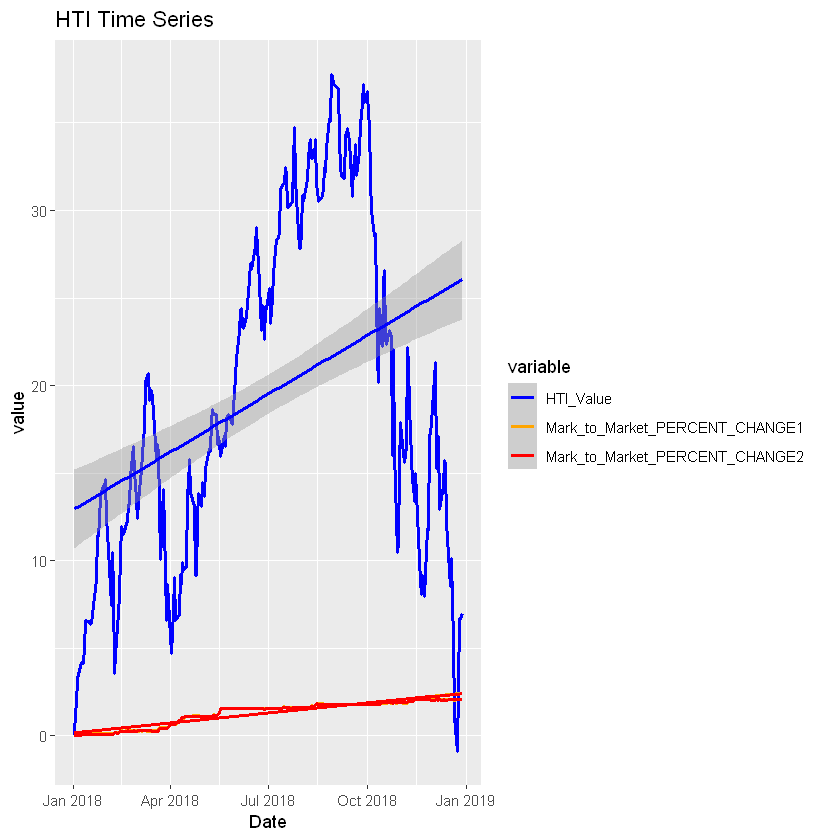

In [31]:
plot1

In [32]:
plot3 = ggplot(plot3Frame, aes(x = Date, y = Mark_to_Market1)) + geom_line(linewidth=1) + ggtitle("5 days rebalancing of buying low")

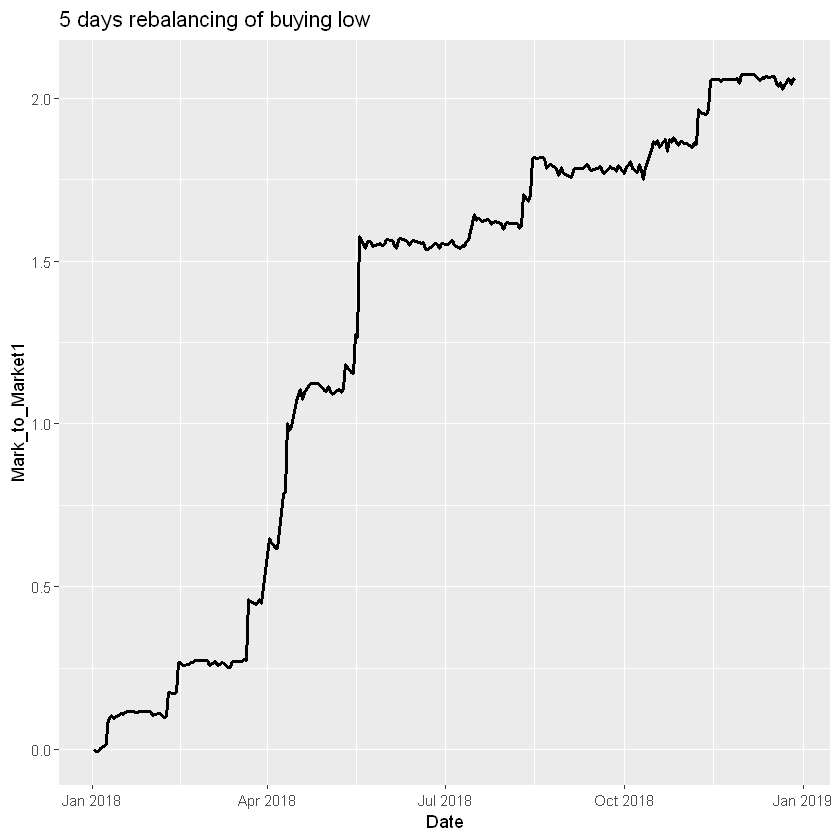

In [33]:
plot3

In [34]:
plot4 = ggplot(plot4Frame, aes(x = Date, y = Mark_to_Market2)) + geom_line(linewidth=1) + ggtitle("5 days rebalancing of buying high")

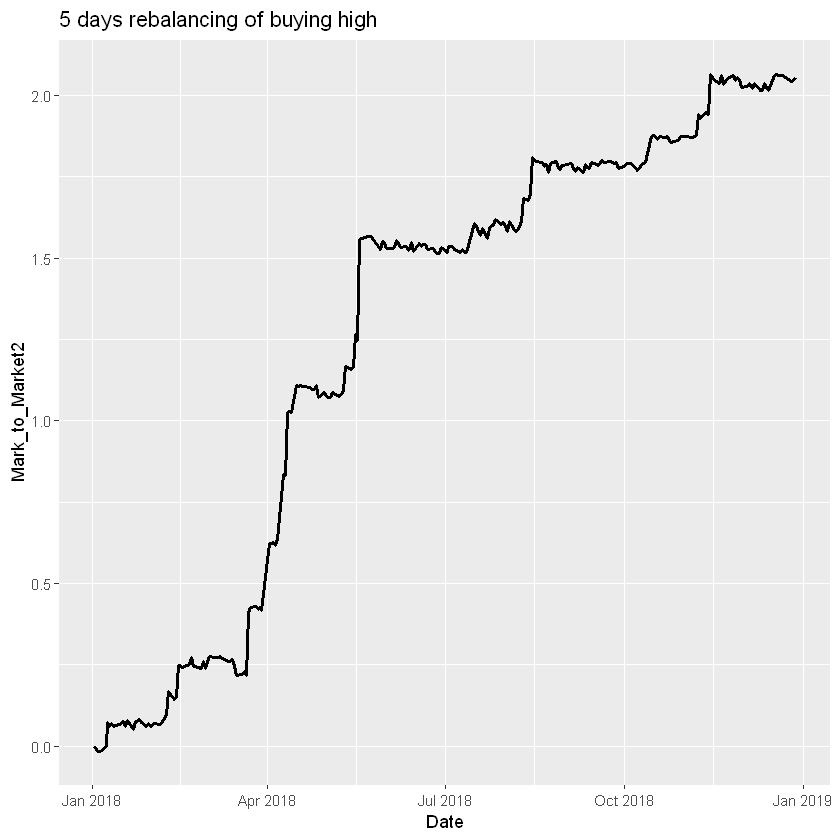

In [35]:
plot4

### Converting Mark_to_Market from USD to JPY
- Using the "Close" column in the USD/JPY dataset we can convert the Mark_to_Market profile from USD to JPY.
- Plotting the currency difference.

In [36]:
forex$Date <- as.Date(as.character(forex$Date), format = "%m/%d/%y")
forex <- select(forex,Date,Close)
Mark_to_Market_low <- portfolio1 %>% mutate(pct_Mark_to_Market = round(((Mark_to_Market - Mark_to_Market[1])*100/(Mark_to_Market)),5))
Mark_to_Market_low$Date <-as.character(Mark_to_Market_low$Date)
Mark_to_Market_low$Date <- as.Date(Mark_to_Market_low$Date, format = "%Y-%m-%d")
y1<- select(Mark_to_Market_low,Date,Mark_to_Market,pct_Mark_to_Market)
currency_df <- right_join(forex, y1, by="Date")
t<- currency_df %>% mutate("Mark_to_Market_JPY"= Close*Mark_to_Market, "pct_Mark_to_Market_JPY"= round(((Mark_to_Market_JPY - Mark_to_Market_JPY[1])*100/(Mark_to_Market_JPY[1])),5))%>% select(Date,pct_Mark_to_Market,pct_Mark_to_Market_JPY)
CURRENCY_DF <- reshape2::melt(t, id.vars="Date", na.rm = T)

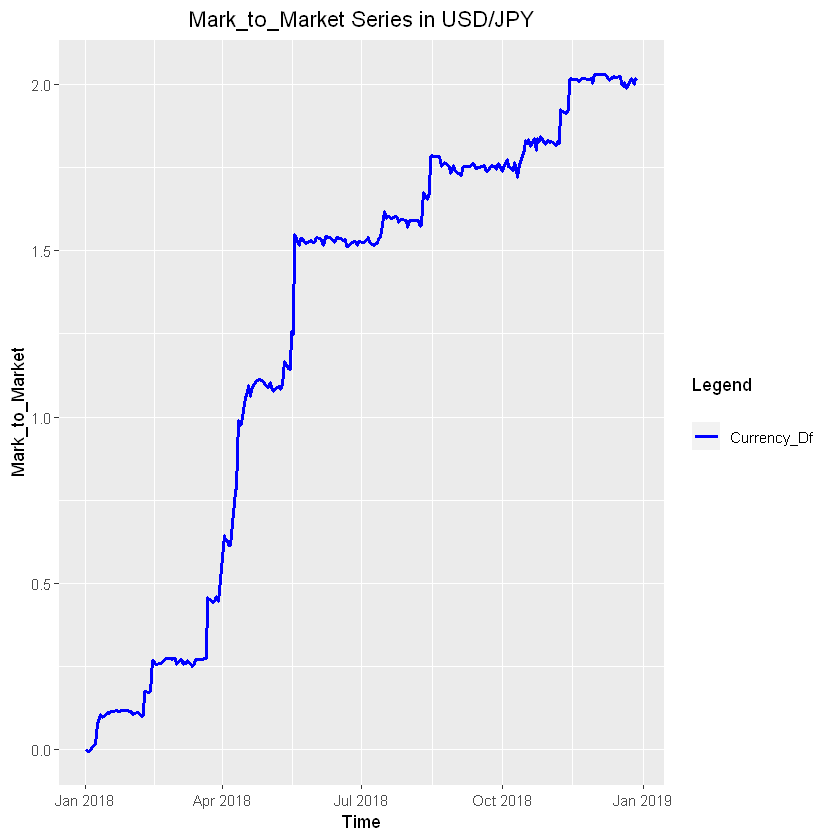

In [37]:
plot2 = ggplot(data.frame(CURRENCY_DF),aes(x=Date, y= value, group=variable, color=variable)) + 
geom_line(linewidth=1) + ggtitle("Mark_to_Market Series in USD/JPY") + theme(plot.title = element_text(hjust = 0.5)) +
labs(x = "Time", y = "Mark_to_Market", color = "Legend \n") + scale_color_manual(labels = c("Currency_Df"), 
values = c("blue"))

plot2

### Final Obsevations
- We can observe that in both strategies our portfolio saw an increase in Mark to Market(Mark_to_Market) value over several rebalancing cycles.
- Portfolio 2: "Rebalancing of buying high" achieved the largest Mark_to_Market value over the same number of cycles. Thus, hinting that our assumption in Strategey 2 was correct and stocks saw an almost continuous surge in Adj Close price in 2018. 

In [38]:
grob_portfolio1 = tableGrob(portfolio1[c(1, 50, 100, 150, 200, 251),])
height1 = grobHeight(grob_portfolio1)
width1 = grobWidth(grob_portfolio1)
title1 = textGrob("Portfolio1", y=unit(0.5,"npc") + height1, vjust=0, gp=gpar(fontsize=15))

In [39]:
grob_portfolio2 = tableGrob(portfolio2[c(1, 50, 100, 150, 200, 251),])
height2 = grobHeight(grob_portfolio2)
width2 = grobWidth(grob_portfolio2)
title2 = textGrob("Portfolio2", y=unit(0.5,"npc") + height2, vjust=0, gp=gpar(fontsize=15))

In [40]:
table_portfolio1 = gTree(children=gList(grob_portfolio1, title1))
table_portfolio2 = gTree(children=gList(grob_portfolio2, title2))

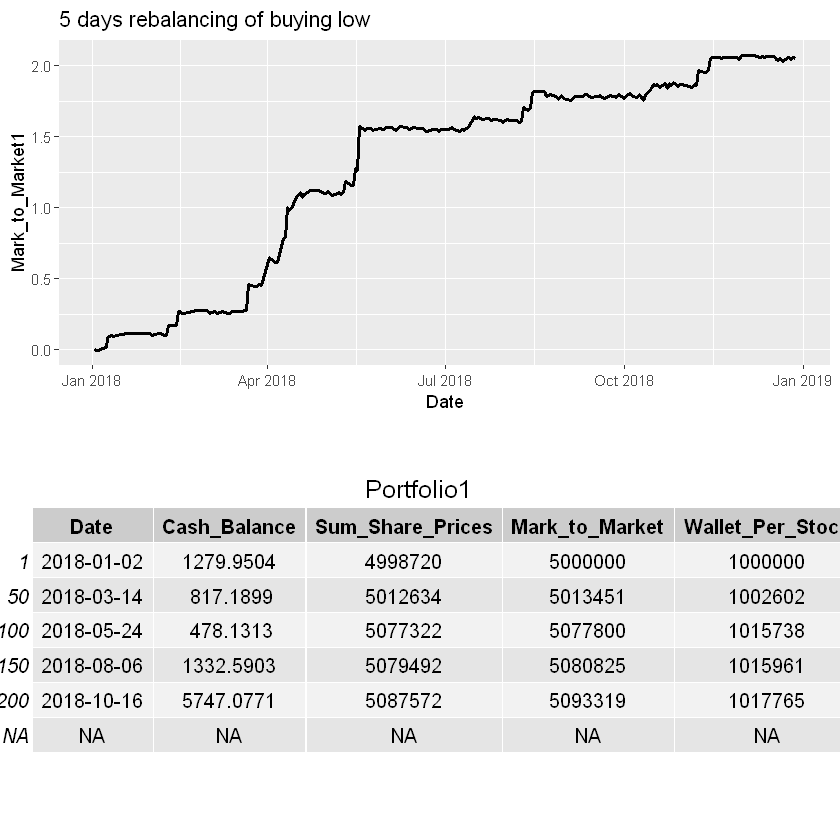

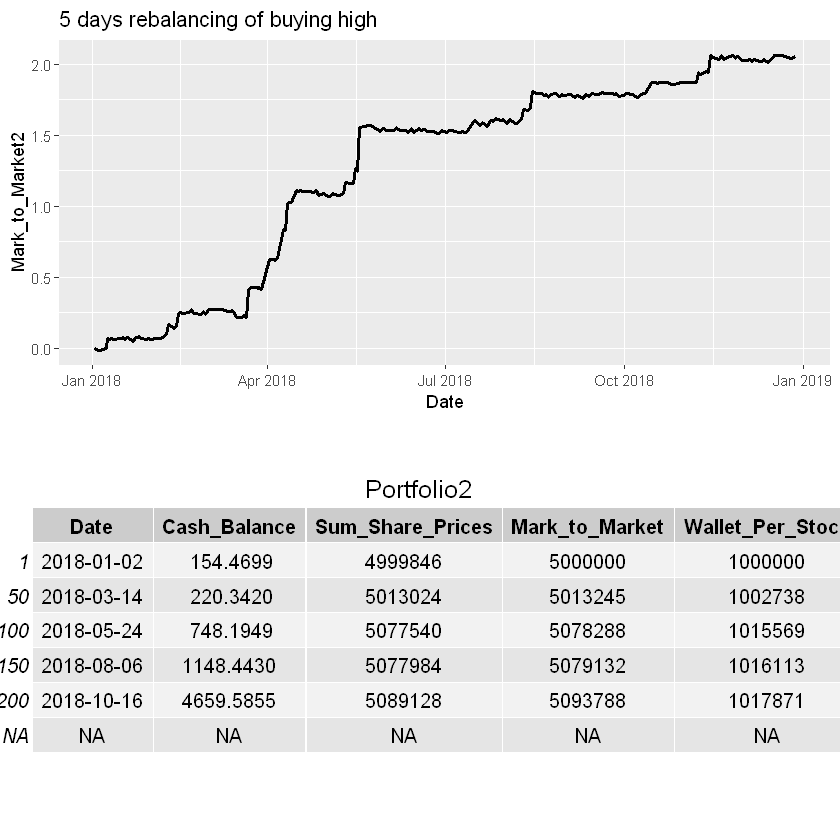

In [41]:
grid.arrange(plot3, table_portfolio1, nrow=2)
grid.arrange(plot4, table_portfolio2, nrow=2)